In [1]:
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
articles = '../00 - Data/articles/articles.csv'
articles_df = pd.read_csv(articles)

customers = '../00 - Data/customers/customers.csv'
customers_df = pd.read_csv(customers)

#not really necessary for now
# sample_submission = 'sample_submission/sample_submission.csv'
# sample_submission_df = pd.read_csv(sample_submission)

transactions_train = '../00 - Data/transactions_train/transactions_train.csv'
transactions_train_df = pd.read_csv(transactions_train)


Analisis over articles_df

In [19]:
articles_df[13:16]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
13,0114428026,0114428,Alice BANDEAU 2-p,306,Bra,Underwear,1010017,Stripe,10,White,3,Light,9,White,1334,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Two soft bandeau bras in soft jersey with side support and a silicone trim at the top.
14,0114428030,0114428,Alice BANDEAU 2-p,306,Bra,Underwear,1010016,Solid,06,Light Grey,1,Dusty Light,12,Grey,1334,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Two soft bandeau bras in soft jersey with side support and a silicone trim at the top.
15,0116379047,0116379,Frugan longsleeve,254,Top,Garment Upper body,1010016,Solid,73,Dark Blue,4,Dark,2,Blue,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted top in soft stretch jersey with a wide neckline and long sleeves.


In [4]:
#0 : size
total_rows,total_columns = articles_df.shape
print("The size of the articles.csv data is " + str(total_rows) + " rows x " + str(total_columns) + " columns")

The size of the articles.csv data is 105542 rows x 25 columns


In [5]:
#1 : null values. Total and as a percentage
nan_counts = articles_df.isna().sum()

for field, count in nan_counts.items():
    percentage = (count / total_rows) * 100
    if(percentage > 0):
        print(f"In field {field} there are {count} null values ({percentage:.2f}%)")

In field detail_desc there are 416 null values (0.39%)


In [6]:
#2.0 : check for numeric columns

for column in articles_df.columns:

    values_as_strings = articles_df[column].astype(str)
    pattern = values_as_strings.str.extract('([0-9]+)').nunique().eq(1).all()
    
    if pattern:
        print(f'{column} mantains a numeric format.')
    else:
        print(f'{column} does not mantain a numeric format.')

#2.1 : check for consistency in id columns

def has_9_digits(value):
    return len(str(value)) == 9

# Check if all values in the "id_product" column have exactly 9 digits
all_have_9_digits = articles_df['article_id'].apply(has_9_digits).all()

if all_have_9_digits:
    print("\nAll article_id values have exactly 9 digits.")
else:
    print("\nNot all article_id values have exactly 9 digits.")


#2.2 : check for unique values in id columns
is_unique = articles_df["article_id"].nunique() == len(articles_df)

if is_unique:
    print("\nThe 'article_id' column has only unique values.")
else:
    print("\nThe 'article_id' column contains duplicate values.")

#Obviously postal_code are not unique values, as two different people can share them

article_id does not mantain a numeric format.
product_code does not mantain a numeric format.
prod_name does not mantain a numeric format.
product_type_no does not mantain a numeric format.
product_type_name does not mantain a numeric format.
product_group_name does not mantain a numeric format.
graphical_appearance_no does not mantain a numeric format.
graphical_appearance_name mantains a numeric format.
colour_group_code does not mantain a numeric format.
colour_group_name does not mantain a numeric format.
perceived_colour_value_id does not mantain a numeric format.
perceived_colour_value_name does not mantain a numeric format.
perceived_colour_master_id does not mantain a numeric format.
perceived_colour_master_name does not mantain a numeric format.
department_no does not mantain a numeric format.
department_name does not mantain a numeric format.
index_code does not mantain a numeric format.
index_name does not mantain a numeric format.
index_group_no does not mantain a numeric f

In [7]:
#3 : description of fields

for field in articles_df.columns:
    print("\n-----------" + field + "-----------\n")
    print(articles_df[field].describe())

#this in turn gives us the number of unique values for string datafields and we can corroborate that customer_id is unique


-----------article_id-----------

count         105542
unique        105542
top       0108775015
freq               1
Name: article_id, dtype: object

-----------product_code-----------

count      105542
unique      47224
top       0783707
freq           75
Name: product_code, dtype: object

-----------prod_name-----------

count              105542
unique              45875
top       Dragonfly dress
freq                   98
Name: prod_name, dtype: object

-----------product_type_no-----------

count     105542
unique       132
top          272
freq       11169
Name: product_type_no, dtype: object

-----------product_type_name-----------

count       105542
unique         131
top       Trousers
freq         11169
Name: product_type_name, dtype: object

-----------product_group_name-----------

count                 105542
unique                    19
top       Garment Upper body
freq                   42741
Name: product_group_name, dtype: object

-----------graphical_appearance_no-

Análisis over customers_df

In [8]:
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,NaN,NaN,ACTIVE,NONE,49,52043ee2162cf5aa7ee79974281641c6f11a68d276429a91f8ca0d4b6efa8100
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,NaN,NaN,ACTIVE,NONE,25,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93f4c830291c32bc3057
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,NaN,NaN,ACTIVE,NONE,24,64f17e6a330a85798e4998f62d0930d14db8db1c054af6c9090f7dd3e38380dc
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,NaN,NaN,ACTIVE,NONE,54,5d36574f52495e81f019b680c843c443bd343d5ca5b1c222539af5973a23ae6d
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,1.0,1.0,ACTIVE,Regularly,52,25fa5ddee9aac01b35208d01736e57942317d756b32ddd4564743b005a805b1d
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,NaN,NaN,ACTIVE,NONE,24,7aa399f7e669990daba2d92c577b52237380662f36480ba9c302f5ec7028f8e6
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,NaN,NaN,ACTIVE,NONE,21,3f47f1279beb72215f4de557d950e0bfa73789d24acb5ebf5492225f97564fbe
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,1.0,1.0,ACTIVE,Regularly,21,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e84b409c0738a2c9613
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a,1.0,1.0,ACTIVE,Regularly,18,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d727ef4abb6678cd9541


In [9]:
#0 : size
total_rows,total_columns = customers_df.shape
print("The size of the customers.csv data is " + str(total_rows) + " rows x " + str(total_columns) + " columns")

The size of the customers.csv data is 1371980 rows x 7 columns


In [10]:
#1 : null values. Total and as a percentage
nan_counts = customers_df.isna().sum()

for field, count in nan_counts.items():
    percentage = (count / total_rows) * 100
    print(f"In field {field} there are {count} null values ({percentage:.2f}%)")

In field customer_id there are 0 null values (0.00%)
In field FN there are 895050 null values (65.24%)
In field Active there are 907576 null values (66.15%)
In field club_member_status there are 6062 null values (0.44%)
In field fashion_news_frequency there are 16011 null values (1.17%)
In field age there are 15861 null values (1.16%)
In field postal_code there are 0 null values (0.00%)


In [11]:
#2.0 : check for numeric columns

for column in customers_df.columns:

    values_as_strings = customers_df[column].astype(str)
    pattern = values_as_strings.str.extract('([0-9]+)').nunique().eq(1).all()
    
    if pattern:
        print(f'{column} mantains a numeric format.')
    else:
        print(f'{column} does not mantain a numeric format.')

#2.1 : check for consistency in id columns

pattern = r"^[0-9a-fA-F]{64}$"
consistent = all(re.match(pattern, item) for item in customers_df["customer_id"])
consistent_postal_code = all(re.match(pattern, item) for item in customers_df["postal_code"])

if consistent and consistent_postal_code:
    print("\nAll data in the column customer_id and postal_code is consistent with the pattern.")
else:
    print("\nNot all data in the column customer_id and postal_codeis consistent with the pattern.")


#2.2 : check for unique values in id columns
is_unique = customers_df["customer_id"].nunique() == len(customers_df)

if is_unique:
    print("\nThe 'customer_id' column has only unique values.")
else:
    print("\nThe 'customer_id' column contains duplicate values.")

#Obviously postal_code are not unique values, as two different people can share them

customer_id does not mantain a numeric format.
FN mantains a numeric format.
Active mantains a numeric format.
club_member_status does not mantain a numeric format.
fashion_news_frequency does not mantain a numeric format.
age does not mantain a numeric format.
postal_code does not mantain a numeric format.

All data in the column customer_id and postal_code is consistent with the pattern.

The 'customer_id' column has only unique values.


In [12]:
#3 : description of fields

for field in customers_df.columns:
    print("\n-----------" + field + "-----------\n")
    print(customers_df[field].describe())

#this in turn gives us the number of unique values for string datafields and we can corroborate that customer_id is unique


-----------customer_id-----------

count                                                              1371980
unique                                                             1371980
top       00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657
freq                                                                     1
Name: customer_id, dtype: object

-----------FN-----------

count     476930
unique         1
top          1.0
freq      476930
Name: FN, dtype: object

-----------Active-----------

count     464404
unique         1
top          1.0
freq      464404
Name: Active, dtype: object

-----------club_member_status-----------

count     1365918
unique          3
top        ACTIVE
freq      1272491
Name: club_member_status, dtype: object

-----------fashion_news_frequency-----------

count     1355969
unique          3
top          NONE
freq       877711
Name: fashion_news_frequency, dtype: object

-----------age-----------

count     1356119
unique         84
top

The most repeated postal code is: 2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c. It is repeated 120303 times.



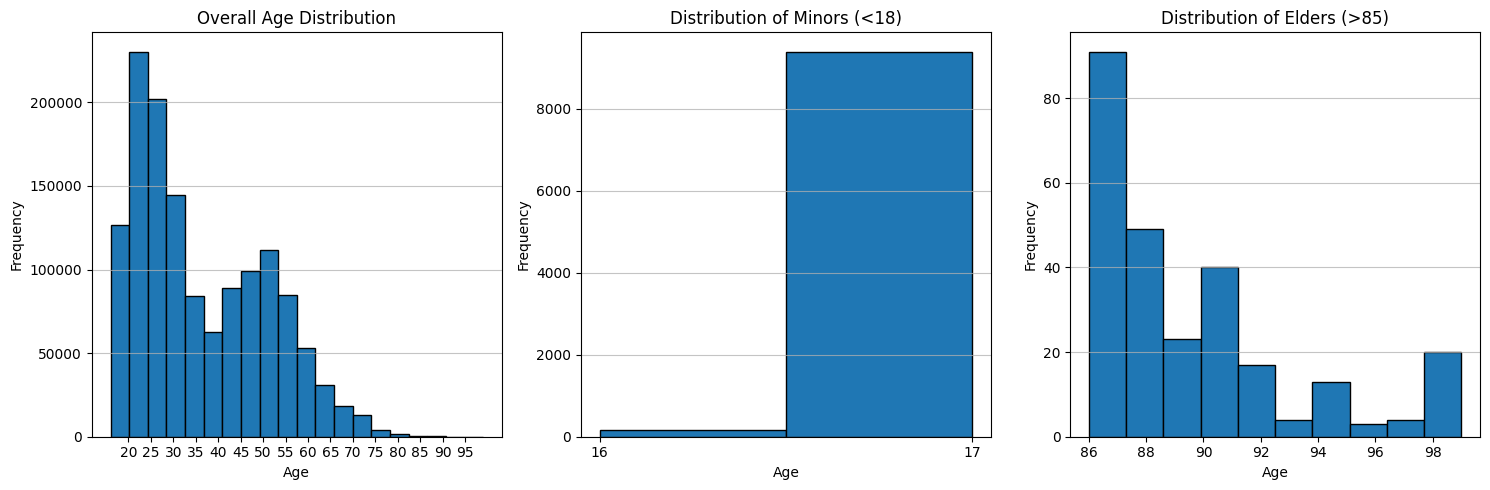

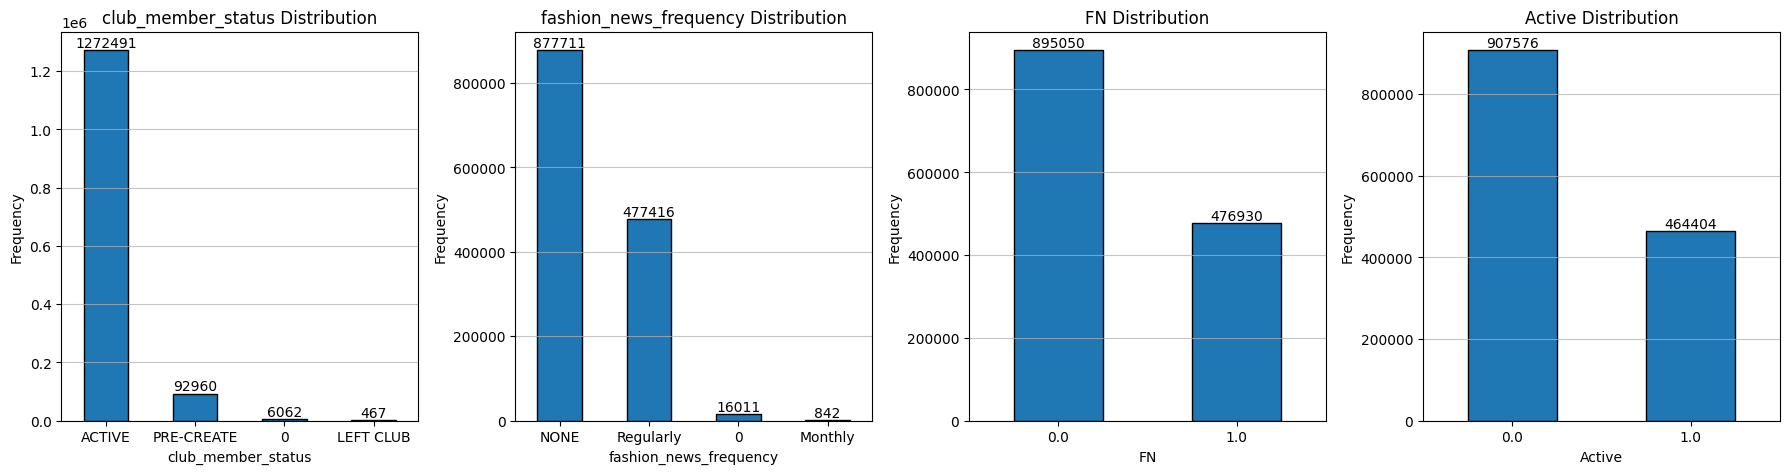

<Axes: ylabel='age'>

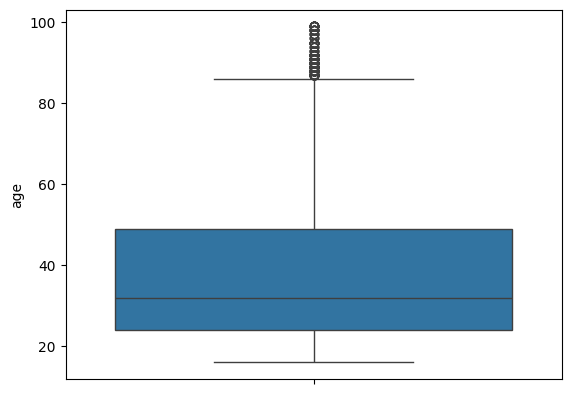

In [25]:
#4 : statistics and plots (in depth for every field) 

#4.0 : postal_code 

value_counts = customers_df['postal_code'].value_counts()
most_common_postal_code = value_counts.idxmax()
count_most_common_postal_code = value_counts.max()

print(f"The most repeated postal code is: {most_common_postal_code}" + f". It is repeated {count_most_common_postal_code} times.\n")

#4.1 : age

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.hist(customers_df['age'], bins=20, edgecolor='black')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Overall Age Distribution')
ax1.grid(axis='y', alpha=0.75)
ax2.set_xticks(range(16, 100))  

# Histogram for minors (<18)
minors = customers_df[customers_df['age'] < 18]
ax2.hist(minors['age'], bins=2, edgecolor='black')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Minors (<18)')
ax2.grid(axis='y', alpha=0.75)
ax1.set_xticks(range(20, 100, 5)) 

# Histogram for elders (>85)
majors = customers_df[customers_df['age'] > 85]
ax3.hist(majors['age'], bins=10, edgecolor='black')
ax3.set_xlabel('Age')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Elders (>85)')
ax3.grid(axis='y', alpha=0.75)


plt.tight_layout()
plt.show()

#4.2 Active, FN and club_member_status

fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(18,5))

def create_bar_plot(column_name, ax):
    
    #treat nan as 0
    customers_df[column_name].fillna(0, inplace=True)

    value_counts = customers_df[column_name].value_counts()

    value_counts.plot(kind='bar', edgecolor='black', ax=ax)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{column_name} Distribution')
    ax.grid(axis='y', alpha=0.75)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Display the count values on top of each bar
    for i, v in enumerate(value_counts):
        ax.text(i, v, str(v), ha='center', va='bottom')


create_bar_plot('club_member_status', ax0)
create_bar_plot('fashion_news_frequency', ax1)
create_bar_plot('FN', ax2)
create_bar_plot('Active', ax3)

plt.tight_layout()
plt.show()

sns.boxplot(data=customers_df['age'])

Transactions.csv analysis

In [24]:
transactions_train_df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,663713001,0.05,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,541518023,0.03,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,505221004,0.02,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,685687003,0.02,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,685687004,0.02,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f99982410630ac51314356,929511001,0.06,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f99982410630ac51314356,891322004,0.04,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e6936f26ea7ecaa68a1,918325001,0.04,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e593881ae6007d775f0f,833459002,0.01,1


In [ ]:
#0 : size
total_rows,total_columns = transactions_train_df.shape
print("The size of the transactions_train_df data is " + str(total_rows) + " rows x " + str(total_columns) + " columns")

In [ ]:
#1 : null values. Total and as a percentage
nan_counts = transactions_train_df.isna().sum()

for field, count in nan_counts.items():
    percentage = (count / total_rows) * 100
    print(f"In field {field} there are {count} null values ({percentage:.2f}%)")

In [27]:
#see the id relationship inbetween customers and transactions 

customer_ids_in_transactions = customers_df['customer_id'].isin(transactions_train_df['customer_id'])
transaction_ids_in_customers = transactions_train_df['customer_id'].isin(customers_df['customer_id'])

if transaction_ids_in_customers.all():
    print("All transactions ids appear in customer_id.")
else:
    print("There are transactions id in customers that do not appear in customer_id.")

if customer_ids_in_transactions.all():
    print("All customer_id values in customers appear in transactions.")
else:
    print("There are customer_id values in customers that do not appear in transactions.")


#see the id relationship inbetween articles and transactions 

articles_ids_in_transactions = articles_df['article_id'].isin(transactions_train_df['article_id'])
transaction_ids_in_articles = transactions_train_df['article_id'].isin(articles_df['article_id'])

if transaction_ids_in_customers.all():
    print("Al id present in transactions come from articles")
else:
    print("There are id present in transactions and not in articles")

if customer_ids_in_transactions.all():
    print("All articles_id values in articles appear in transactions.")
else:
    print("There are articles_id values in articles that do not appear in transactions.")

All transactions ids appear in customer_id.
There are customer_id values in customers that do not appear in transactions.
Al id present in transactions come from articles
There are articles_id values in articles that do not appear in transactions.


In [17]:
#get id present in customers_df and not in transactions (im sure there is better ways of doing this but im tired)
merged = pd.merge(customers_df, transactions_train_df, on='customer_id', how='left', indicator=True)
unique_to_df1 = merged[merged['_merge'] == 'left_only']
unique_ids = unique_to_df1['customer_id']
unique_ids

3094        00058ecf091cea1bba9d800cabac6ed1ae284202cdab68bec5c8429eb3271c0c
6840        000df4d2084d142416b8165bdd249bab8fea2393447aed8df063eb3a68b17b14
11979       00193ff7f374dbcfecfa7fead0488e454be4918bec1ebd25fda7cd7cc094718a
14349       001f00e8c1eba437ff0dbad26a9a3d49e47cbf05fff02ad5706eab2902a31fd0
17374       002648d8f3b288531b24860f4a68a31d029ec5a0495c0436c4f09b97dd26887a
                                          ...                               
31785004    ffe5801cb2a5b51d4d068322d7f8082e995f427a6f22a6f471e773a29a27a3d0
31787759    ffeb3ca867aba57a312fe9d28d67dd46ef2240fe92a94c434a0debd1902c386a
31792747    fff456fa60aac9174456c2f36ede5e0f25429a16c88a346dfb99333eb604cd6f
31795692    fffa8d3cea26d4f5186472b923629b35fa28051f25803084f9fb0b0b7b3fc0eb
31797669    ffff01710b4f0d558ff62d7dc00f0641065b37e840bb43bd852afccb08f2bbd2
Name: customer_id, Length: 9699, dtype: object

In [33]:
#get id present in articles_df and not in transactions
merged = pd.merge(articles_df, transactions_train_df, on='article_id', how='left', indicator=True)
unique_to_df1 = merged[merged['_merge'] == 'left_only']
unique_ids = unique_to_df1['article_id']
unique_ids

243223      187949032
531460      288859020
1018864     395730045
1422118     423900056
1746703     462435036
              ...    
31788915    949323002
31789192    950449002
31789234    952937003
31789317    957375001
31789318    959461001
Name: article_id, Length: 995, dtype: int64

ALL DF'S

In [8]:
articles_df[0:3]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [9]:
customers_df[0:3]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,NaN,NaN,ACTIVE,NONE,49.00,52043ee2162cf5aa7ee79974281641c6f11a68d276429a91f8ca0d4b6efa8100
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,NaN,NaN,ACTIVE,NONE,25.00,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93f4c830291c32bc3057
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,NaN,NaN,ACTIVE,NONE,24.00,64f17e6a330a85798e4998f62d0930d14db8db1c054af6c9090f7dd3e38380dc


In [12]:
transactions_train_df[0:3]

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,663713001,0.05,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,541518023,0.03,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,505221004,0.02,2
